# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_merge.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1699,w914,Capomulin,Male,24,21,30,40.993110,0
600,h246,Ketapril,Male,13,30,5,49.470417,0
412,e227,Placebo,Male,1,30,20,56.607552,1
248,c264,Zoniferol,Female,11,27,20,54.568196,1
1441,s710,Capomulin,Female,1,23,45,40.728578,1


In [7]:
# Checking the number of mice.
rat_count=mouse_merge["Mouse ID"].nunique()

rat_count

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplirat=mouse_merge[mouse_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
doppleratter=duplirat["Mouse ID"].unique()

doppleratter

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
doppleratter_data=mouse_merge[mouse_merge["Mouse ID"]=="g989"]

doppleratter_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse=mouse_merge[mouse_merge["Mouse ID"] !="g989"]

clean_mouse.sample(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
751,j913,Ramicane,Female,4,17,5,44.014900,0
1382,s166,Placebo,Male,19,27,10,49.000125,0
1180,p189,Ketapril,Male,8,28,45,75.294936,4
1437,s710,Capomulin,Female,1,23,25,43.060409,1
1078,o287,Ceftamin,Male,2,28,5,45.586804,0


In [15]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=clean_mouse["Mouse ID"].nunique()

clean_mouse_count

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
ratgimen = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

ratgimen

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_ratgimen = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).reset_index()

advanced_ratgimen

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

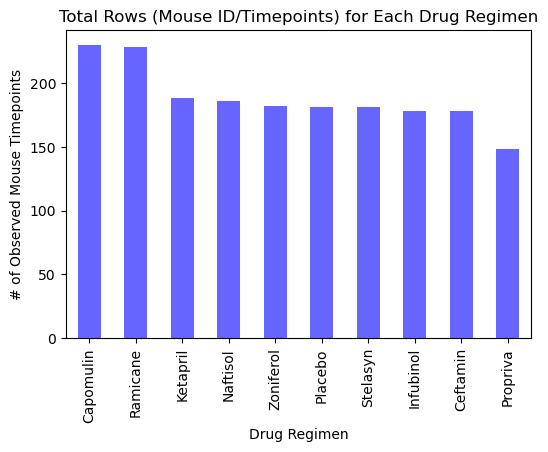

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_mouse['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', color='blue', alpha=0.6, title='Total Rows (Mouse ID/Timepoints) for Each Drug Regimen', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen', figsize=(6, 4))

plt.show()

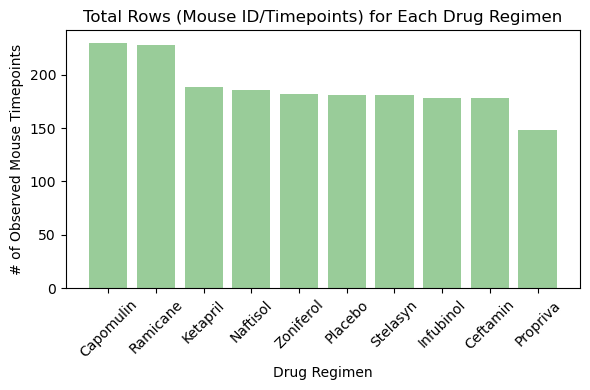

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts_redux= clean_mouse['Drug Regimen'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(drug_counts.index, drug_counts.values, color="green", alpha=0.4)

plt.title('Total Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()

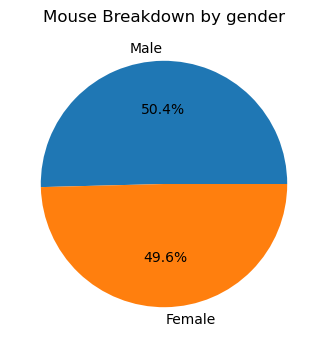

In [38]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Get the unique mice with their gender
unique_mice_gender.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='Mouse Breakdown by gender',
    ylabel='',
    figsize=(4, 4)
)

# Make the pie chart
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

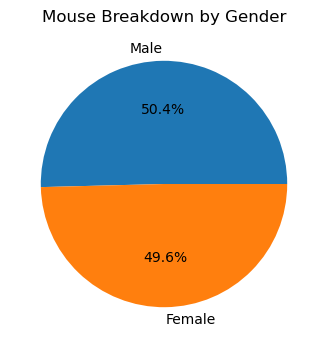

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Get the unique mice with their gender
plt.figure(figsize=(4, 4))
plt.pie(
    unique_mice_gender.values, 
    labels=unique_mice_gender.index, 
    autopct='%1.1f%%', 
    startangle=0
)
plt.title('Mouse Breakdown by Gender')

# Make the pie chart
plt.show

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoint, clean_mouse, on=["Mouse ID", "Timepoint"], how="left")


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
outlier_data = {}

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_data[final_tumor_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)

    # add subset
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    outlier_data[treatment] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers.tolist()
    }

outlier_df = pd.DataFrame(outlier_data).T

print(outlier_df)

          Lower Bound Upper Bound      Outliers
Capomulin   20.704562   51.832015            []
Ramicane    17.912664   54.306811            []
Infubinol   36.832905   82.741446  [36.3213458]
Ceftamin     25.35545   87.666458            []


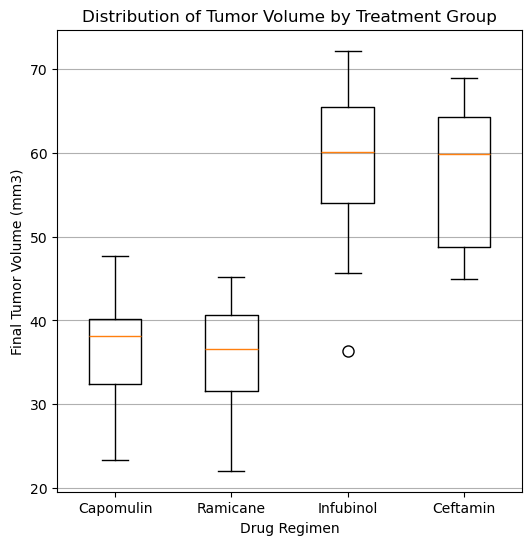

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 6))
plt.boxplot(
    [data.dropna() for data in tumor_vol_data],  
    labels=treatments,
    flierprops=dict(marker='o', markersize=8)
)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(axis='y')

plt.show()

## Line and Scatter Plots

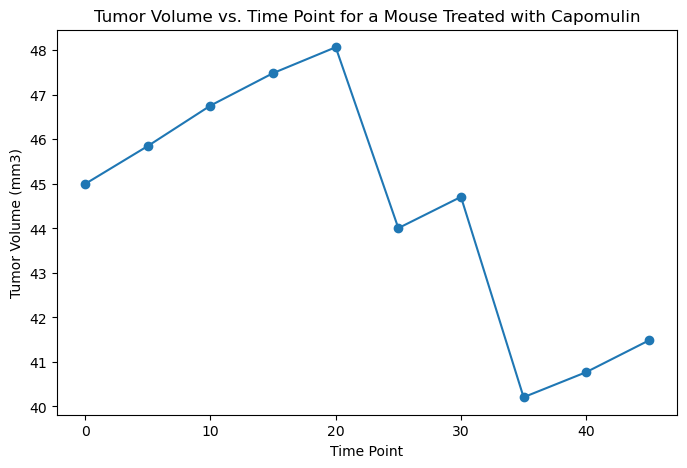

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = clean_mouse[
    (clean_mouse["Drug Regimen"] == "Capomulin") & 
    (clean_mouse["Mouse ID"] == "l509")
]

plt.figure(figsize=(8, 5))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')

plt.title("Tumor Volume vs. Time Point for a Mouse Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

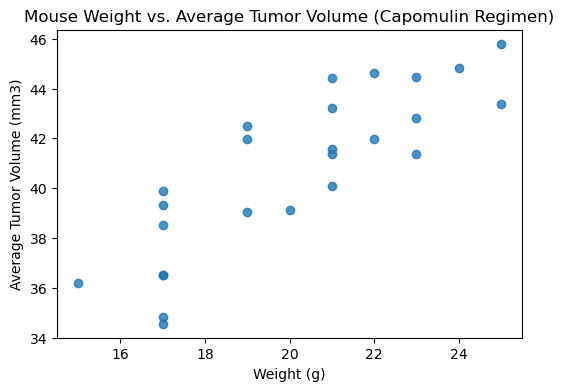

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse[clean_mouse["Drug Regimen"] == "Capomulin"]

capomulin_avg_tumor = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Weight=("Weight (g)", "first")
).reset_index()



plt.figure(figsize=(6, 4))
plt.scatter(capomulin_avg_tumor["Weight"], capomulin_avg_tumor["Avg_Tumor_Volume"], alpha=0.8)

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

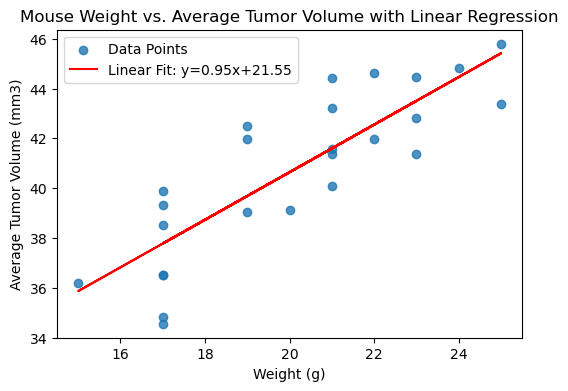

In [81]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
weights = capomulin_avg_tumor["Weight"]
avg_tumor_volumes = capomulin_avg_tumor["Avg_Tumor_Volume"]

correlation = weights.corr(avg_tumor_volumes)
slope, intercept, r_value, p_value, std_err = linregress(weights, avg_tumor_volumes)
regression_line = slope * weights + intercept

# Generate the scatter plot

plt.figure(figsize=(6, 4))
plt.scatter(weights, avg_tumor_volumes, label="Data Points", alpha=0.8)
plt.plot(weights, regression_line, color='red', label=f"Linear Fit: y={slope:.2f}x+{intercept:.2f}")
plt.title("Mouse Weight vs. Average Tumor Volume with Linear Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

plt.show